# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Task 1
 
# Data Validation & Cleaning

In [125]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
product_sales = pd.read_csv('product_sales.csv')
product_sales

week  sales_method  ... nb_site_visits          state
0         2         Email  ...             24        Arizona
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
3         4         Email  ...             25        Indiana
4         3         Email  ...             28       Illinois
...     ...           ...  ...            ...            ...
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey
14999     5  Email + Call  ...             25       Illinois

[15000 rows x 8 columns]

In [126]:
#Check for all non-null values and verifying data types
product_sales.info()

# Check columns for any missing values
product_sales.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

There are 15000 rows and 8 columns in the dataset with 1074 missing values (column:revenue).

In [127]:
# Drop missing values
product_sales.dropna(inplace=True)

# Check if there are missing values after dropping
product_sales.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [128]:
# Check for duplicates
duplicates = product_sales[product_sales.duplicated(keep=False)]
duplicates

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []

In [129]:
product_sales.shape

(13926, 8)

After handling the missing values (drop) and ensuring there are no duplicates the shape of the table is: 13,926 rows and 8 columns.

In [130]:
# Verify unique values in 'week' column
product_sales['week'].value_counts()

1    3497
4    2387
5    2366
2    2323
3    2257
6    1096
Name: week, dtype: int64

In [131]:
# Verify unique values in 'sales_method' column
product_sales['sales_method'].value_counts()

Email           6915
Call            4781
Email + Call    2203
em + call         20
email              7
Name: sales_method, dtype: int64

"email" into the "Email" category to standardize the capitalization.

"em + call" should be merged into "Email + Call" for consistency in phrasing.

In [132]:
# Merge similar categories and check again
product_sales['sales_method'] = product_sales['sales_method'].replace('em + call','Email + Call')
product_sales['sales_method'] = product_sales['sales_method'].str.capitalize()
product_sales['sales_method'].value_counts()

Email           6922
Call            4781
Email + call    2223
Name: sales_method, dtype: int64

In [133]:
# Verify unique values in 'customer_id' column
product_sales['customer_id'].value_counts()

3998a98d-70f5-44f7-942e-789bb8ad2fe7    1
e86c5916-467b-4506-9a49-6b2a532da5d4    1
aa81e824-0230-4ca0-8a93-05671cb2887d    1
a4c0db94-6109-4ec3-9cd9-7d038b0ef379    1
1f1f4b36-52d7-4978-97da-dff202225488    1
                                       ..
5ef8a0c6-46e3-46c7-8636-f491ce0bb171    1
eca998e8-1cc7-40b7-ba29-4605c5a7cf64    1
d7ecbcbf-7c52-46a4-8519-15ede0645cfd    1
94bca04f-f872-4a57-abc2-5a6d0f44cf62    1
e4dad70a-b23b-407c-8bd3-e32ea00fae17    1
Name: customer_id, Length: 13926, dtype: int64

All customer ids are unique.

In [134]:
# Verify unique values in 'nb_sold' column
product_sales['nb_sold'].value_counts().sort_index()

7      681
8     1838
9     3316
10    3424
11    2276
12     961
13     846
14      93
15     461
16      30
Name: nb_sold, dtype: int64

In [135]:
# Verify unique values in 'revenue' column
product_sales['revenue'].value_counts().sort_index()

32.54     1
32.59     1
32.62     1
32.67     1
32.69     1
         ..
235.59    1
236.75    1
237.19    1
238.23    1
238.32    1
Name: revenue, Length: 6743, dtype: int64

In [136]:
# Outliers in 'years_as_customer' column

years_outlier = product_sales[product_sales['years_as_customer'] > 39]
years_outlier

week sales_method  ... nb_site_visits       state
13741     2        Email  ...             24  California
13800     4         Call  ...             27  California

[2 rows x 8 columns]

Founding year of Pens and Printers (1984) , there are two rows where the years as customers is greater than 39, which is not in line with the expected time frame.

In [137]:
# Filter dataframe to remove years_outliers
product_sales = product_sales[product_sales['years_as_customer'] <= 39]

#Verify if they have been removed
years_outlier = product_sales[product_sales['years_as_customer'] > 39]
years_outlier

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []

Outliers have been removed. 

In [138]:
# Verify unique values in 'nb_site_visits' column
product_sales['nb_site_visits'].value_counts().sort_index()

12       1
13       4
14       7
15      29
16      79
17     101
18     208
19     400
20     567
21     862
22    1135
23    1380
24    1476
25    1557
26    1524
27    1344
28    1074
29     821
30     609
31     329
32     234
33      99
34      40
35      27
36      13
37       4
Name: nb_site_visits, dtype: int64

In [139]:
# Verify unique values in 'state' column
product_sales['state'].value_counts()

California        1737
Texas             1109
New York           899
Florida            826
Illinois           576
Pennsylvania       553
Ohio               520
Michigan           466
Georgia            460
North Carolina     430
New Jersey         402
Virginia           346
Indiana            327
Washington         309
Tennessee          308
Arizona            295
Missouri           286
Massachusetts      270
Maryland           245
Wisconsin          235
Minnesota          228
Oregon             214
Louisiana          213
South Carolina     213
Colorado           212
Alabama            202
Kentucky           202
Oklahoma           184
Connecticut        167
Iowa               154
Mississippi        133
Kansas             129
Arkansas           118
Utah               115
Nevada              97
Nebraska            86
New Mexico          79
West Virginia       77
Hawaii              67
Maine               60
Idaho               59
New Hampshire       48
Montana             43
Rhode Islan

In [140]:
# Verify Number of States included
product_sales['state'].nunique()

50

In [141]:
# Clean Dataset
product_sales

week  sales_method  ... nb_site_visits          state
1         6  Email + call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
4         3         Email  ...             28       Illinois
5         6          Call  ...             24    Mississippi
6         4         Email  ...             28        Georgia
...     ...           ...  ...            ...            ...
14994     4         Email  ...             25           Ohio
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey

[13924 rows x 8 columns]

## 1. Describe validation and cleaning steps for every column. 

There were 15,000 rows and 8 columns within the dataset:

Week:

Validation: Checked that the data covers weeks 1 to 6, ensuring the analysis reflects the period right after the product launch. This helps in understanding the early market response.
Cleaning: No cleaning was needed as the week data was accurate and consistent.

Sales Method:

Validation: Identified and reviewed different variations in the sales methods (e.g., 'email', 'Email', 'em + call', etc.) to ensure consistency in the dataset.
Cleaning: Standardized these sales methods into three categories: 'Email', 'Email + call', and 'Call' to make the data clearer and easier to analyze.

Customer ID:

Validation: Ensured that there were 15,000 unique customer IDs in the dataset, which allows for personalized tracking of each customer's transaction history.
Cleaning: No cleaning was required since the data was already clean, with no duplicates or missing values.

Nb_sold (Number of Products Sold):

Validation: Checked the transaction volumes to ensure they were within a reasonable range (7 to 16 products per transaction), reflecting moderate sales per customer.
Cleaning: No cleaning required since the values in this column were accurate and fell within the expected range.

Revenue:

Validation: Identified 1,074 missing revenue values in the dataset.
Cleaning: Dropped missing revenue values to ensure accurate financial analysis, resulting in a dataset of 13,926 rows with complete data.

Years as Customer:

Validation: Verified the consistency of customer data by checking the years based on the company’s founding year (1984).
Cleaning: Dropped two rows (47 & 63) that did not align with the company’s founding year, ensuring the data accurately represents customer history.

Nb_site_visits (Number of Site Visits):

Validation: Reviewed the data for site visits.
Cleaning: No cleaning was needed as the data was accurate and meaningful for analysis.

State:

Validation: Ensured that there were 50 unique states in the dataset, confirming that all regional data was captured correctly.
Cleaning: No cleaning was needed since the state data was accurate, with no missing or duplicate entries.

**After cleaning this dataset, there are now 13,924 rows and 8 columns**, this is due to us dropping those with missing rows in the revenue column as well as dropping the two extreme outliers in the 'years_as_customer' column.

# Task 2 
 
# Exploratory Analysis

Include two different graphics showing single variables only to demonstrate the characteristics of data.
Include at least one graphic showing two or more variables to represent the relationship between features
Describe your findings.

## 1. How many customers were there for each approach?


In [142]:
# Checking how many customers for each approach
customer_count_by_method = product_sales['sales_method'].value_counts()
customer_count_by_method

Email           6921
Call            4780
Email + call    2223
Name: sales_method, dtype: int64

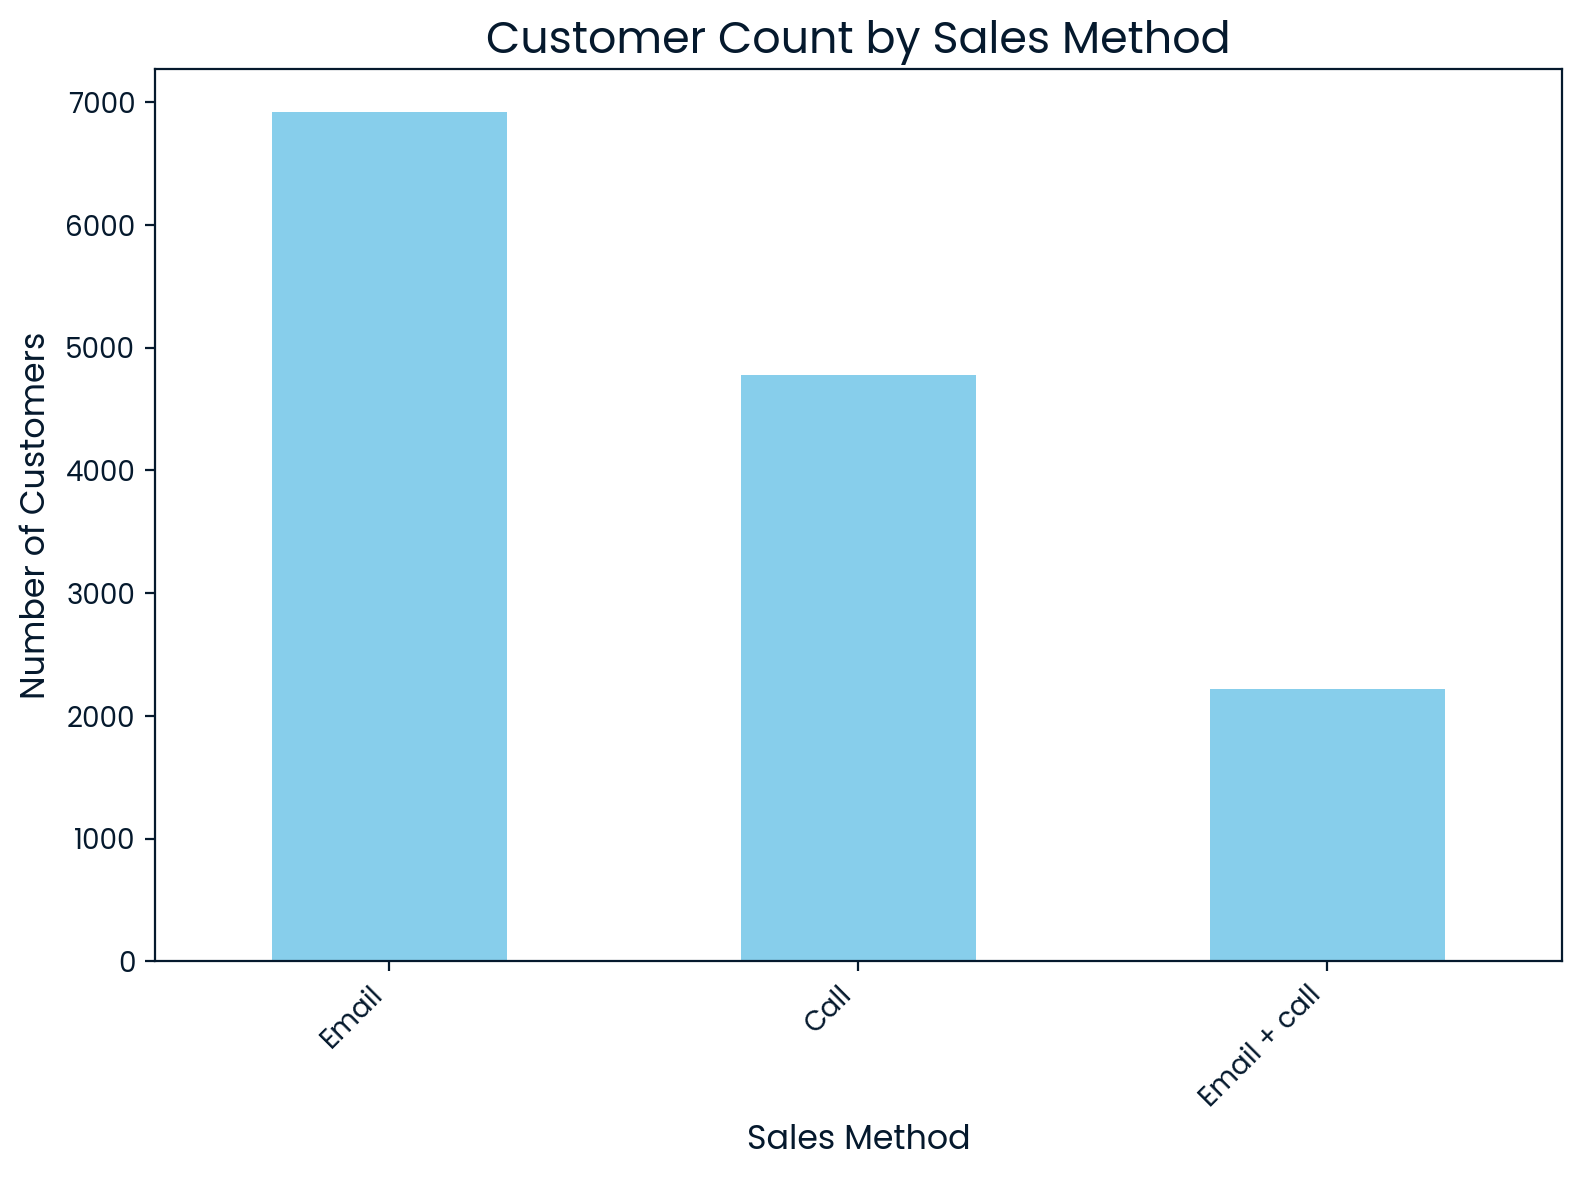

In [143]:
# Creating the bar chart
plt.figure(figsize=(8, 6))
customer_count_by_method.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Customer Count by Sales Method', fontsize=16)
plt.xlabel('Sales Method', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


The bar graph displays the number of customers for three different sales methods. The sales methods are "Email," "Call," and "Email + Call." 

"Email" is the most effective sales approach with 6,921 customers. "Call" comes in second with 4,780 customers. The combined approach "Email + Call" has the least, with 2,223 customers.

## 2. What does the spread of the revenue look like overall? And for each method?

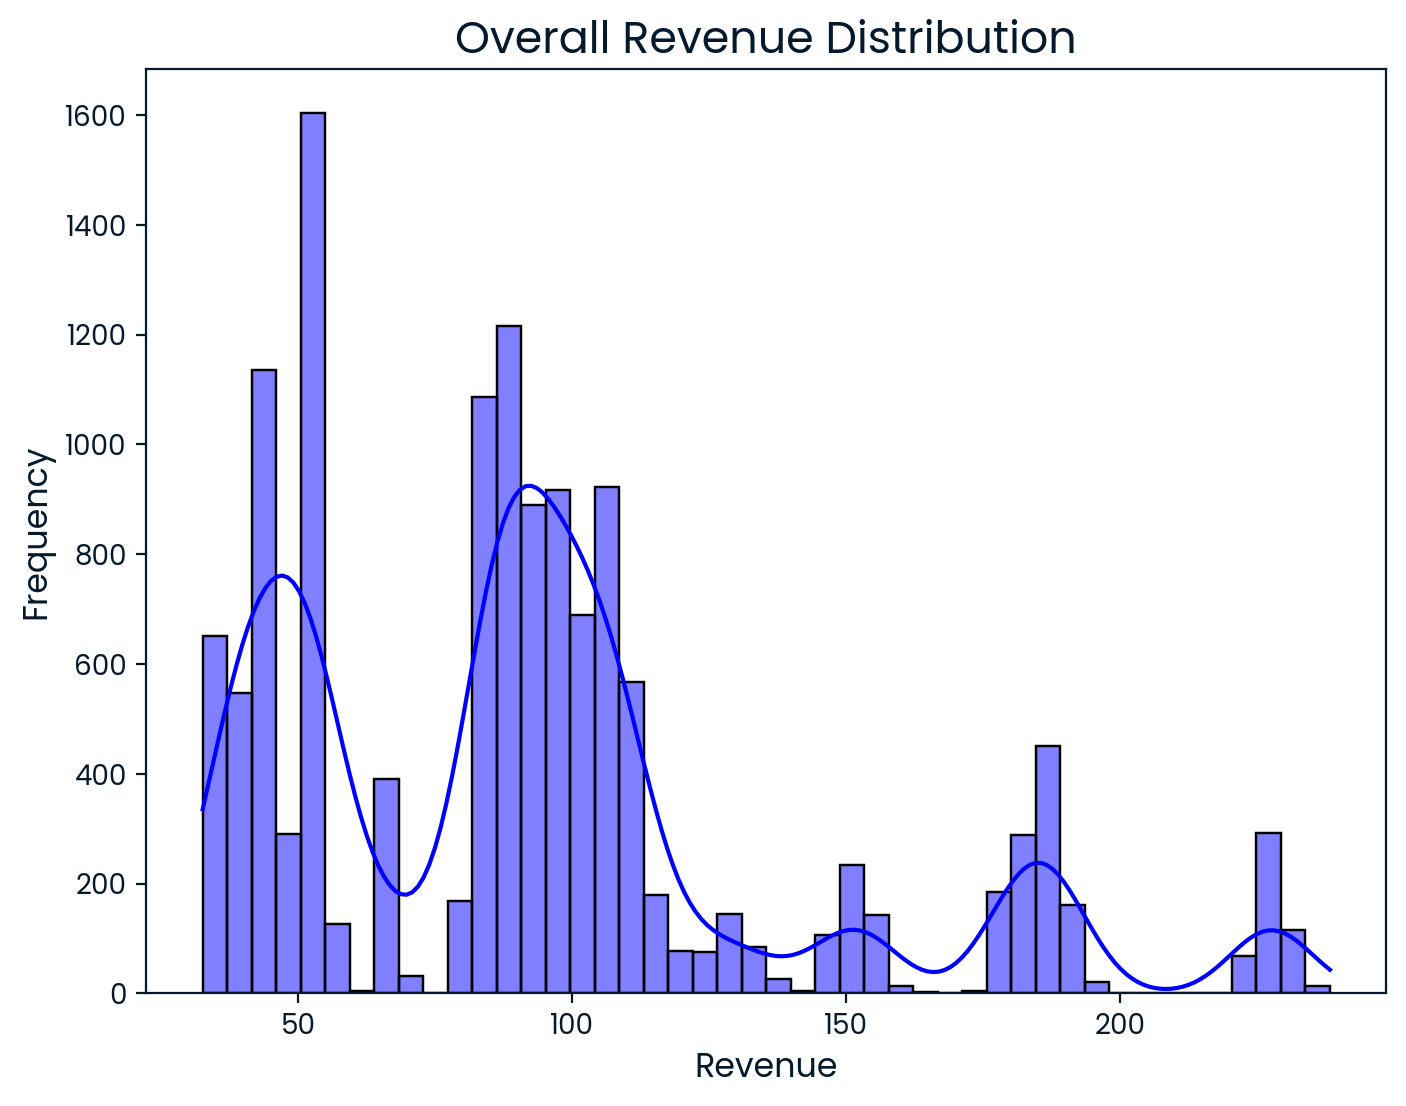

In [144]:
# Overall Revenue Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(product_sales['revenue'], kde=True, color='blue')
plt.title('Overall Revenue Distribution', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The peak points indicate where sales are at their highest. We observe significant activity at 50 and 90 items, which could be the ideal price points or the most commonly sold product quantities.

The highest points on the graph (at 50 or 90 items) represent the areas with the strongest performance.

The data suggests avoiding the valleys around 70 and above 120, as these areas show lower activity.

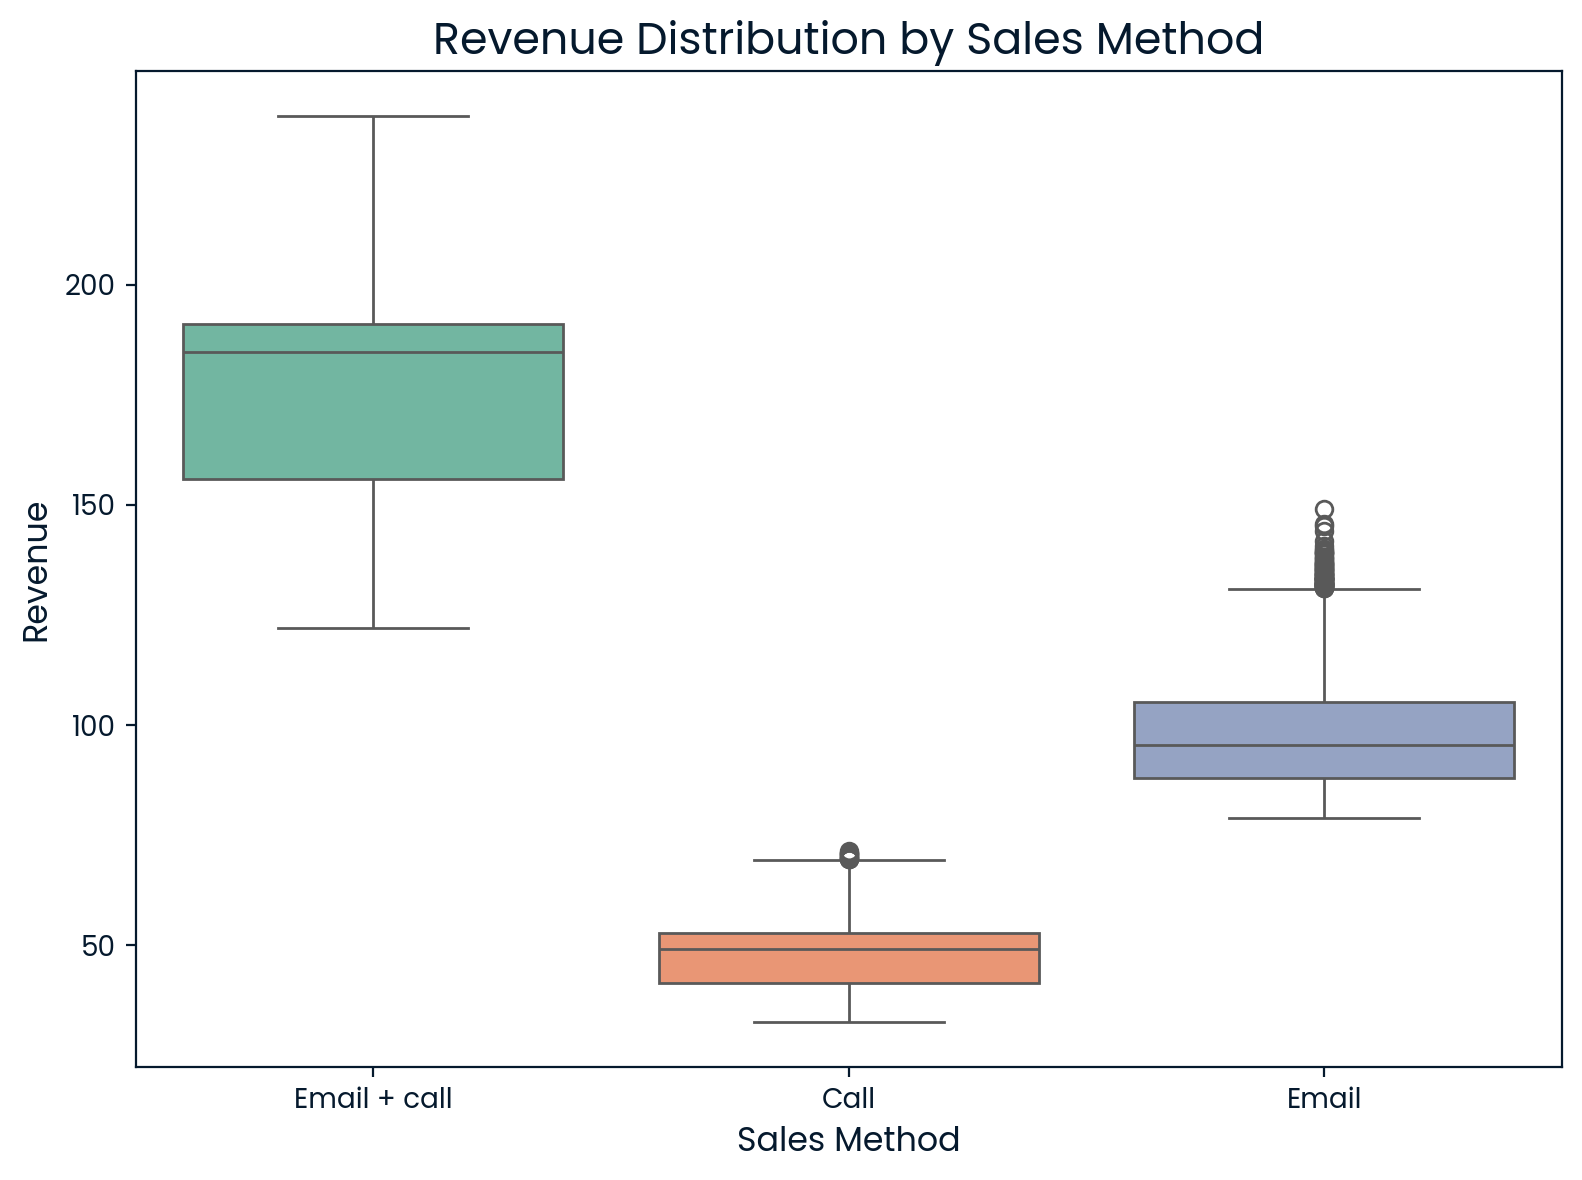

In [145]:
# Revenue Distribution by Sales Method (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='sales_method', y='revenue', data=product_sales, palette='Set2')
plt.title('Revenue Distribution by Sales Method', fontsize=16)
plt.xlabel('Sales Method', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.tight_layout()
plt.show()

Email + call: This method results in highest revenue.

Call: Revenue for the 'Call' method is mostly concentrated around 50, with a few outliers above this level. These outliers suggest that while calls generally result in moderate sales, they can sometimes lead to much higher revenue, possibly due to successful negotiations or deeper customer engagement.

Email: The 'Email' method tends to have sales clustered below 100 and just over 100, with a few outliers around 150. These outliers likely represent successful marketing campaigns or promotions that resonated well with customers, encouraging them to make higher-value purchases.

## 3. Was there any difference in revenue over time for each of the methods?

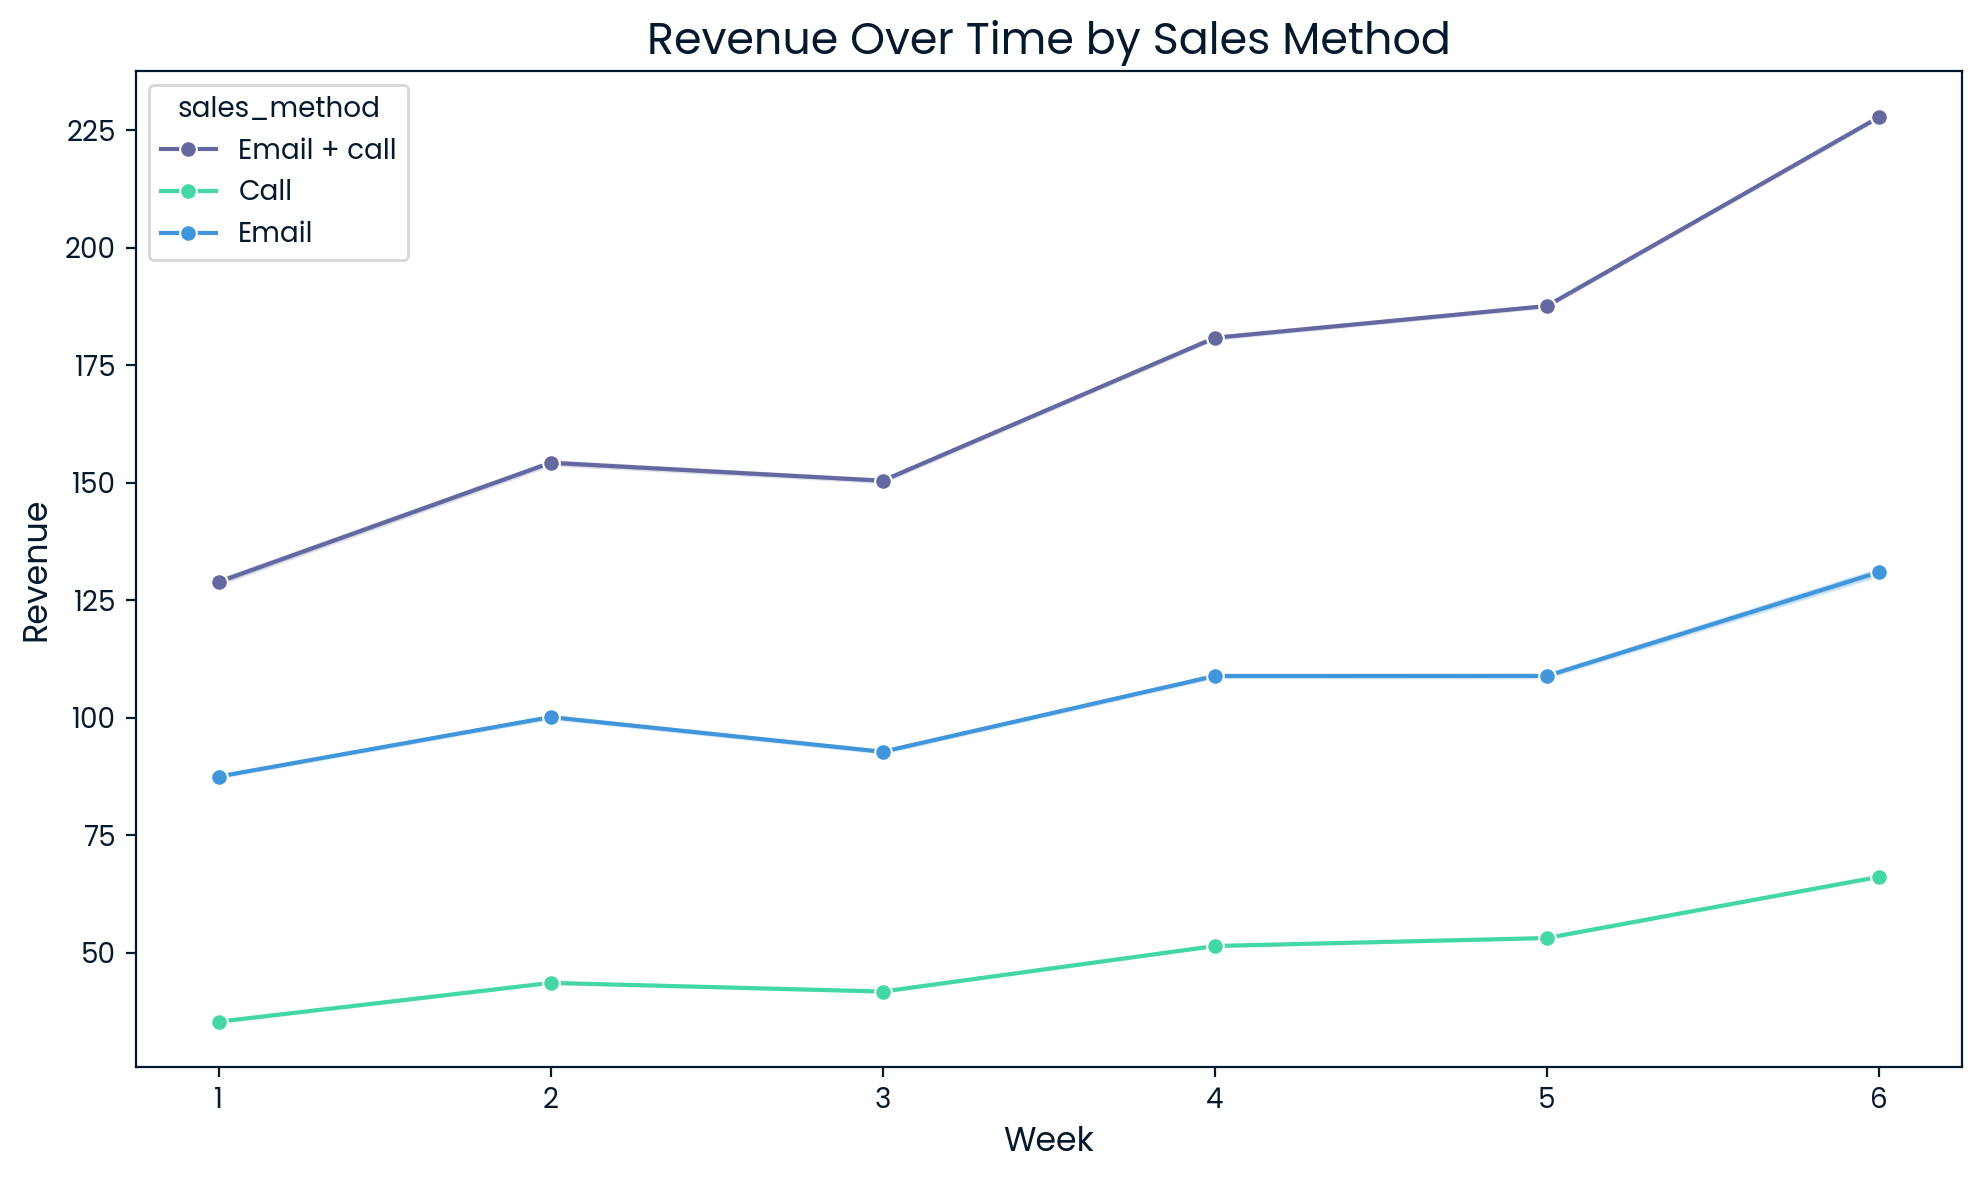

In [146]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='week', y='revenue', hue='sales_method', data=product_sales, marker='o')
plt.title('Revenue Over Time by Sales Method', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.tight_layout()
plt.show()

By examining the average revenue for each sales method week by week, we observe that the 'Email + Call' method starts with the highest mean revenue, while the 'Call' approach generates the lowest. This trend continues in the following weeks, with each method showing an upward trajectory while maintaining consistent rankings. In the end, 'Email + Call' consistently produced the highest mean revenue, followed by 'Email' and then 'Call'.

week  sales_method
1     Call             26159.18
      Email           229765.55
      Email + call     16885.33
2     Call             33792.02
      Email           137794.35
      Email + call     26376.23
3     Call             36247.27
      Email            98792.14
      Email + call     48737.14
4     Call             49543.52
      Email           107788.37
      Email + call     78296.20
5     Call             53518.11
      Email            74373.45
      Email + call    126809.72
6     Call             28252.92
      Email            23706.75
      Email + call    111152.07
Name: revenue, dtype: float64


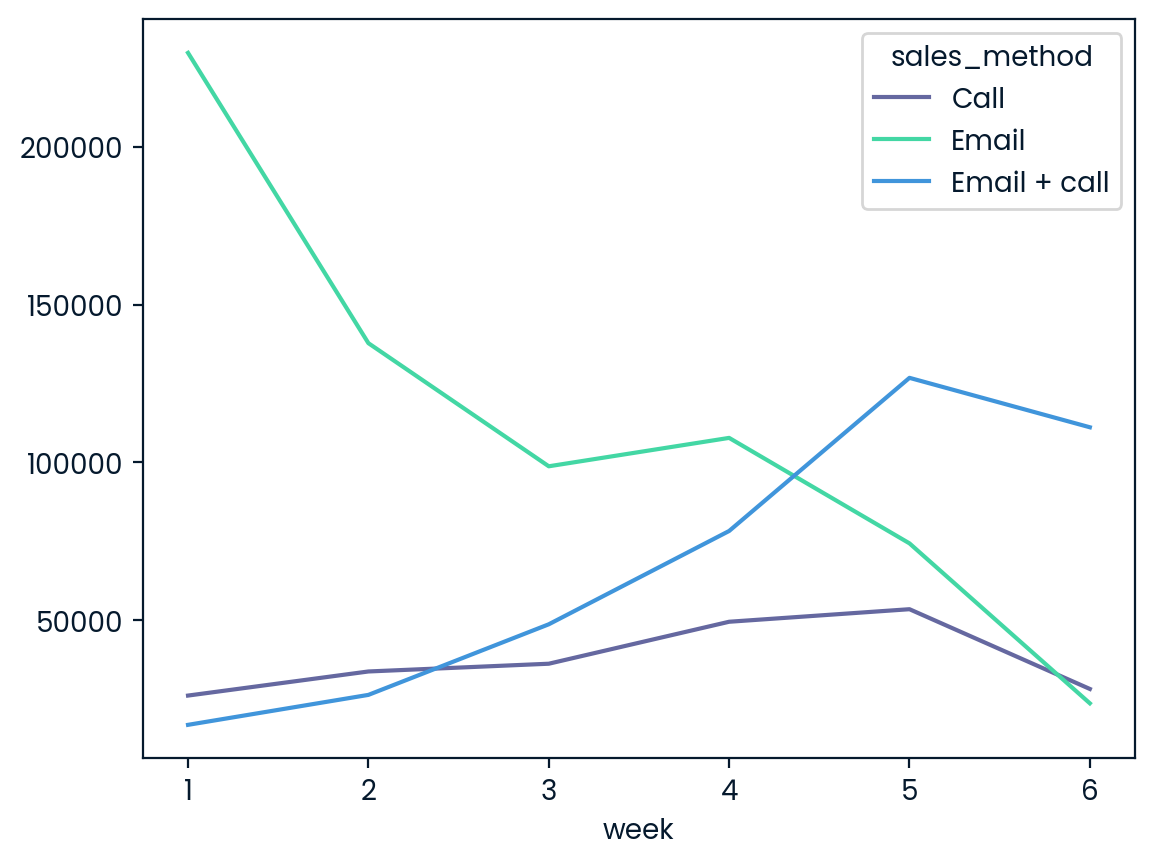

In [147]:
rev_sum = product_sales.groupby(['week', 'sales_method'])['revenue'].sum()
rev_sum.unstack().plot()
print(rev_sum)

The line graph shows that the Email method started strong in Week 1 with 229,765.55 USD but dropped over 58% in the following weeks, falling to 98,792 USD. The Email + Call approach began lower but ended on top, consistently increasing in revenue, making it the most successful method. 

# Task 3

## 1. Definition of a metric for the business to monitor.
Key Metric: **Average Weekly Revenue per Sales Method**

The key metric for this business is Average Weekly Revenue per Sales Method, which measures the effectiveness of each sales method (Call, Email, and Email + Call) in generating revenue on a weekly basis.



In [148]:
# Pivot Table of Mean & Median for each Sales Method across the 6 week period
product_sales.groupby(['week', 'sales_method'])['revenue'].agg(['mean', 'median']).unstack().style.background_gradient()

## 2. How should the business use the metric to monitor the business problem.
By analyzing average weekly revenue trends, the company can assess which sales approach drives the most growth. 

The existing data shows the following average weekly revenue for each sales method over the 6-week period:

Call Method:

Week 1: 35.35
Week 2: 43.60
Week 3: 41.76
Week 4: 51.45
Week 5: 53.15
Week 6: 66.17

Trend: Gradual increase, suggesting improvement.

Email Method:

Week 1: 87.50
Week 2: 100.14
Week 3: 92.76
Week 4: 108.88
Week 5: 108.89
Week 6: 130.98

Trend: Steady increase, indicating a reliable sales driver.

Email + Call Method:

Week 1: 128.90
Week 2: 154.25
Week 3: 150.42
Week 4: 180.82
Week 5: 187.59
Week 6: 227.77

Trend: Strong growth, outperforming the other two methods.

**Use of the Metric.**

Informed Decision-Making:

This metric can be used for data-driven decision-making, helping to allocate resources effectively. For example, if Email + Call continues to outperform other methods, more budget could be assigned to that strategy.

Setting Revenue Targets:

This metric can help set realistic revenue targets for each method based on past performance and forecast trends.

Sales Strategy Adjustments:

The metric enables the company to continuously monitor and adjust sales strategies. If one method begins to underperform, the company can pivot to a more effective strategy based on current data.

## 3. Can you estimate initial value(s) for the metric based on the current data.
Based on the given data, the estimated initial values for the metric (Average Weekly Revenue per Sales Method) are:

Call Method (Average Weekly Revenue):

Week 1: 35.35
Week 2: 43.60
Week 3: 41.76
Week 4: 51.45
Week 5: 53.15
Week 6: 66.17

Average Revenue (over 6 weeks): 48.74

Email Method (Average Weekly Revenue):

Week 1: 87.50
Week 2: 100.14
Week 3: 92.76
Week 4: 108.88
Week 5: 108.89
Week 6: 130.98

Average Revenue (over 6 weeks): 101.87

Email + Call Method (Average Weekly Revenue):

Week 1: 128.90
Week 2: 154.25
Week 3: 150.42
Week 4: 180.82
Week 5: 187.59
Week 6: 227.77

Average Revenue (over 6 weeks): 163.79

These initial values provide a baseline for the company's weekly revenue by each sales method, which can be monitored and used for future performance comparisons and strategy adjustments.

# Task 4 

## Final Summary and Recommendations:

1. Prioritize the Email + Call Method

Why Prioritize:

The Email + Call method generated the highest average revenue and showed consistent growth across most weeks. This method also required significantly less time per customer (10 minutes per call) compared to the Call-only method, making it more efficient while still producing superior results.

How to Improve:

- Scale the Email + Call Method by training the sales team on optimizing the combination of email outreach and targeted calls.
- Introduce automated email tools to streamline the email portion, allowing sales agents to focus more on the calls and high-value customer interactions.
- Use data-driven insights to personalize email content for different customer segments to further boost engagement and conversion rates.
- Track call efficiency—review call scripts and timing to ensure that agents spend minimal time while maximizing impact during the call.

2. Enhance the Email Strategy

Why Enhance:

The Email-only method has shown consistent upward movement. It is an effective, low-effort method that can drive revenue if optimized further.

How to Improve:

- Segment your email audience more precisely to tailor content and offers based on customer behaviors, preferences, and demographics.
- Test and refine email messaging by experimenting with different subject lines, offers, and calls to action (A/B testing).
- Focus on value-driven content that emphasizes the benefits customers can gain from the product/service, aiming to improve conversion rates.

3. Reduce Focus on the Call-only Method

Why Reduce:

The Call-only method consistently underperformed in terms of revenue and required more time per customer (30 minutes). This makes it less efficient compared to Email and Email + Call methods, which generate higher returns with less effort.

How to Improve:

- Reallocate resources away from Call-only efforts towards more productive strategies (Email and Email + Call).
- 
- Analyze why the Call-only method is underperforming, such as low conversion rates or misaligned customer targeting. Adjust tactics or scrap ineffective practices altogether.

4. Focus on Weekly Average Revenue per Sales Method

Why Track:

By regularly tracking Weekly Average Revenue per Sales Method, the company can identify trends, track the effectiveness of each method, and make timely adjustments to strategies.

How to Improve:

- Monitor trends continuously to identify any dip or surge in performance, allowing for quick intervention and strategy adjustments.
- Set up automated tracking systems to capture weekly revenue data and enable real-time analysis.
- Compare methods weekly, ensuring that resources are allocated toward the highest-performing strategies (Email and Email + Call).
- Use quarterly reviews of this metric to adjust long-term strategy and forecasting.

5. Comparison to Industry Benchmarks.

Benchmarking: To truly understand how well the company is doing, it should compare these metrics to industry benchmarks for each sales method. 

For example:

- What is the average revenue per call or email in the industry for similar businesses?
- How does the company’s growth rate compare to competitors?
- If Email + Call revenue growth is above industry standards, the company can look into scaling this method further. If the Call method is below industry performance, there’s room for optimization.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation